<a href="https://colab.research.google.com/github/stepsbtw/Algoritmos/blob/main/algorithms_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritmos - Assignment 1
##Análise e ordenação de dados da COVID-19

- Aluno : Caio Passos Torkst Ferreira
- Professor : Daniel Yukimura

#1) Leitura e Filtragem inicial dos dados
Carregue os dados em sua linguagem de programação preferida (por exemplo, Python com pandas).

In [ ]:
import pandas as pd
import requests
from io import BytesIO

r = requests.get("https://data.brasil.io/dataset/covid19/caso.csv.gz")
caso = pd.read_csv(BytesIO(r.content), compression="gzip")

r = requests.get("https://data.brasil.io/dataset/covid19/caso_full.csv.gz")
caso_full = pd.read_csv(BytesIO(r.content), compression="gzip")

In [ ]:
caso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838003 entries, 0 to 2838002
Data columns (total 13 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   date                            object 
 1   state                           object 
 2   city                            object 
 3   place_type                      object 
 4   confirmed                       int64  
 5   deaths                          int64  
 6   order_for_place                 int64  
 7   is_last                         bool   
 8   estimated_population_2019       float64
 9   estimated_population            float64
 10  city_ibge_code                  float64
 11  confirmed_per_100k_inhabitants  float64
 12  death_rate                      float64
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 262.5+ MB


In [ ]:
caso_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853648 entries, 0 to 3853647
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      float64
 12  last_available_deaths                     

Descrição das colunas:

- **city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).**
- city_ibge_code: código IBGE do local.
- **date: data de coleta dos dados no formato YYYY-MM-DD.**
- epidemiological_week: número da semana epidemiológica no formato YYYYWW.
- estimated_population: população estimada para esse município/estado em 2020, segundo o IBGE. (acesse o script que faz o download e conversão dos dados de população).
- estimated_population_2019: população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.
- is_last: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).
- is_repeated: campo pré-computado que diz se as informações nesse registro foram publicadas pela Secretaria Estadual de Saúde no dia date ou se o dado é repetido do último dia em que o dado está disponível (igual ou anterior a date). Isso ocorre pois nem todas as secretarias publicam boletins todos os dias. Veja também o campo last_available_date.
- **last_available_confirmed: número de casos confirmados do último dia disponível igual ou anterior à data date.**
- **last_available_confirmed_per_100k_inhabitants: número de casos confirmados por 100.000 habitantes (baseado em estimated_population) do último dia disponível igual ou anterior à data date.**
- last_available_date: data da qual o dado se refere.
- **last_available_death_rate: taxa de mortalidade (mortes / confirmados) do último dia disponível igual ou anterior à data date.**
- **last_available_deaths: número de mortes do último dia disponível igual ou anterior à data date.**
- order_for_place: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.
- place_type: tipo de local que esse registro descreve, pode ser city ou state.
- **state: sigla da unidade federativa, exemplo: SP.**
- new_confirmed: número de novos casos confirmados desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).
- new_deaths: número de novos óbitos desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).

Recomendadas para análise:
- city
- state
- last_avaible_confirmed
- last_available_deaths
- estimated_population
- last_available_confirmed_per_100k_inhabitants
- last_available_death_rate
- date

Para análises estatísticas mais simples:

In [ ]:
# Uma linha por município
df = caso[(caso["is_last"]==True) & (caso["place_type"]=="city")]

Para análise de desempenho de algoritmos com volumes maiores de dados (várias datas por município):

In [ ]:
# Séries temporais completas.
df_full = caso_full[(caso_full["place_type"]=="city") & (caso_full["is_repeated"]==False)]

Checar e tratar (remover linhas) colunas com valores nulos.

In [ ]:
df.count()

,0
date,5589
state,5589
city,5589
place_type,5589
confirmed,5589
deaths,5589
order_for_place,5589
is_last,5589
estimated_population_2019,5570
estimated_population,5570


In [ ]:
df_clean = df.dropna(subset=["confirmed_per_100k_inhabitants", "estimated_population"])
df_full.count()

,0
city,2818241
city_ibge_code,2807856
date,2818241
epidemiological_week,2818241
estimated_population,2807856
estimated_population_2019,2807856
is_last,2818241
is_repeated,2818241
last_available_confirmed,2818241
last_available_confirmed_per_100k_inhabitants,2793772


In [ ]:
df_full_clean = df_full.dropna(subset=["last_available_confirmed_per_100k_inhabitants"])
df_full_clean

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0000,0,1,city,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0000,0,2,city,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0000,0,3,city,AC,1,0
6,Rio Branco,1200401.0,2020-03-20,202012,413418.0,407319.0,False,False,7,1.69320,2020-03-20,0.0000,0,4,city,AC,3,0
8,Rio Branco,1200401.0,2020-03-21,202012,413418.0,407319.0,False,False,11,2.66075,2020-03-21,0.0000,0,5,city,AC,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838382,Tocantínia,1721109.0,2021-12-08,202149,7617.0,7545.0,True,False,1013,13299.19916,2021-12-08,0.0128,13,569,city,TO,13,0
3838383,Tupirama,1721257.0,2021-12-08,202149,1922.0,1891.0,True,False,223,11602.49740,2021-12-08,0.0090,2,565,city,TO,0,0
3838384,Tupiratins,1721307.0,2021-12-08,202149,2729.0,2671.0,True,False,199,7292.04837,2021-12-08,0.0151,3,565,city,TO,0,0
3838385,Wanderlândia,1722081.0,2021-12-08,202149,11734.0,11683.0,True,False,1433,12212.37430,2021-12-08,0.0147,21,590,city,TO,0,0


# 2) Cálculo de Métricas
Para cada município:
- Taxa de casos por 100 mil habitantes:
  - casos/habitantes * 100 000
- Taxa de óbitos por 100 mil habitantes:
  - obitos/habitantes * 100 000
- Taxa de mortalidade:
  - obitos/casos

In [ ]:
# Atenção! Existem muitos municípios com o mesmo nome em estados diferentes:
counts = df_clean["city"].value_counts()
counts[counts>1]

,count
city,
São Domingos,5
Bom Jesus,5
Planalto,4
São Francisco,4
Vera Cruz,4
...,...
Petrolândia,2
Tabatinga,2
São Carlos,2


Portanto vamos usar o indentificador único do ibge.

In [ ]:
df_resposta = df_clean[["city", "state", "city_ibge_code"]].copy()

df_resposta["taxa_casos_100k"] = df_clean["confirmed"] / df_clean["estimated_population"] * 10**5
df_resposta["taxa_obitos_100k"] = df_clean["deaths"] / df_clean["estimated_population"] * 10**5
df_resposta["taxa_mortalidade"] = df_clean["deaths"] / df_clean["confirmed"]

df_resposta

,city,state,city_ibge_code,taxa_casos_100k,taxa_obitos_100k,taxa_mortalidade
734,Amapá,AP,1600105.0,15500.163274,141.504300,0.009129
1320,Calçoene,AP,1600204.0,16380.682823,123.828056,0.007559
1901,Cutias,AP,1600212.0,14325.520406,114.735289,0.008009
2478,Ferreira Gomes,AP,1600238.0,19656.081336,87.862433,0.004470
3058,Itaubal,AP,1600253.0,9791.703756,53.409293,0.005455
...,...,...,...,...,...,...
2835558,Águas de São Pedro,SP,3500600.0,13092.871343,340.812269,0.026030
2836080,Álvares Florence,SP,3501202.0,17164.792981,438.716753,0.025559
2836553,Álvares Machado,SP,3501301.0,10028.802304,316.025282,0.031512
2837057,Álvaro de Carvalho,SP,3501400.0,5536.594615,170.648464,0.030822


# 3) Ordenação:
Implemente os algoritmos de ordenação abaixo e aplique-os para classificar os municípios por:
- Maior taxa de casos por 100 mil hab.
- Maior taxa de mortalidade.
- Menor taxa de mortalidade.

Compare:
- Merge Sort
- Quick Sort
- Função nativa da linguagem (ex: sort() do Python)

Mergesort (TopDown):

In [ ]:
def merge(vL, vR, compare=lambda x,y : x<y): # auxiliary O(n) space
  out = []
  i = j = 0
  # inserting
  while i < len(vL) and j < len(vR):
    if compare(vL[i], vR[j]): # rev
      out.append(vL[i])
      i += 1
    else:
      out.append(vR[j])
      j += 1
  # extending
  while i < len(vL):
    out.append(vL[i])
    i += 1
  while j < len(vR):
    out.append(vR[j])
    j += 1

  return out

def mergesort(v, l=0, r=None, compare=lambda x,y : x<y):
  if r == None:
    r = len(v)-1
  # base case
  if l == r:
    return [v[l]]
  # divide T(n//2)
  m = (l+r)//2
  vL = mergesort(v, l, m, compare)
  vR = mergesort(v, m+1, r, compare)
  # conquer O(n)
  return merge(vL, vR, compare)

Quicksort:

In [ ]:
import random

def partition(v, l, r, compare=lambda x,y : x<y):
  pidx = random.randint(l, r)
  v[pidx], v[r] = v[r], v[pidx]  # move o pivô para o fim
  pivo = v[r]
  i = l
  for j in range(l,r):
    if compare(v[j], pivo):
      v[i], v[j] = v[j], v[i]
      i+=1
  v[i], v[r] = v[r], v[i]
  return i

def quicksort(v, l=0, r=None, compare=lambda x,y : x<y):  # inplace
  if r == None:
    r = len(v)-1
  if l < r:
    # divide (random)
    pidx = partition(v, l, r, compare)
    # conquer
    quicksort(v, l, pidx-1, compare)
    quicksort(v, pidx+1, r, compare)

## Sobre os algoritmos iterativos:
Como o DataFrame é bem grande, eu utilizarei a forma ITERATIVA dos algoritmos para evitar estouro da pilha de recursão.

In [ ]:
def merge(v, l1, r1, l2, r2, compare=lambda x,y : x<y):
  out = []
  i, j = l1, l2

  while i <= r1 and j <= r2:
    if compare(v[i], v[j]):
      out.append(v[i])
      i += 1
    else:
      out.append(v[j])
      j += 1

  while i <= r1:
    out.append(v[i])
    i += 1
  while j <= r2:
    out.append(v[j])
    j += 1

  for k in range(len(out)):
        v[l1 + k] = out[k]

def mergesort(v, l=0, r=None, compare=lambda x,y : x<y): # topdown iterative
  if r == None:
    r = len(v)-1
  n = len(v)
  if n <= 1:
    return v
  stack = [(0, n-1, False)]
  while stack:
    l, r, divided = stack.pop()
    if l < r:
      m = (l + r) // 2
      if not divided:
        # dividir
        stack.append((l, r, True)) # marcar como dividido
        stack.append((m+1, r, 0)) # direita
        stack.append((l, m, 0)) # esquerda
      else:
        merge(v, l, m, m+1, r, compare)

def quicksort(v, l=0, r=None, compare=lambda x,y : x<y):
  if r == None:
    r = len(v)-1
  stack = [(l,r)]
  while stack:
    l,r = stack.pop()
    if l < r:
      pidx = partition(v, l, r, compare)
      stack.append((l,pidx-1))
      stack.append((pidx+1,r))

## Sobre ordenar o DataFrame:
Para ordenar apartir das colunas, preciso salvar um array com os índices ordenados.

Estou usando o DataFrame mais simples usado para análise estatística.

In [ ]:
idx = list(range(len(df_clean)))

Ordenando por Taxa de Casos por 100k habitantes de forma DECRESCENTE.

In [ ]:
idx_m, idx_q, idx_s = idx.copy(), idx.copy(), idx.copy()

data = list(df_clean["confirmed_per_100k_inhabitants"])

mergesort(idx_m, compare=(lambda i,j: data[i] >= data[j]))
quicksort(idx_q, compare=(lambda i,j: data[i] >= data[j]))
idx_s.sort(key=lambda i: data[i], reverse=True)

# comparison of stability
print(idx_m == idx_q)
print(idx_q == idx_s)
print(idx_m == idx_s)

df_sorted_confirmed_per_100k = df_clean.iloc[idx_s]
df_sorted_confirmed_per_100k

False
False
True


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1657808,2022-03-14,RN,Severiano Melo,city,1084,15,465,True,2440.0,2088.0,2413607.0,51915.70881,0.0138
700844,2021-11-28,GO,Porteirão,city,2000,22,516,True,3881.0,3931.0,5218052.0,50877.63928,0.0110
42116,2021-12-18,AM,Japurá,city,1051,11,586,True,2755.0,2251.0,1302108.0,46690.35984,0.0105
2432006,2022-03-24,RS,Santa Cecília do Sul,city,720,4,601,True,1639.0,1634.0,4316733.0,44063.64749,0.0056
849622,2022-03-10,PA,Jacareacanga,city,3319,40,569,True,8239.0,7590.0,1503754.0,43728.59025,0.0121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567794,2021-09-16,MA,Primeira Cruz,city,82,3,467,True,15315.0,15431.0,2109403.0,531.39784,0.0366
518949,2021-09-16,MA,Central do Maranhão,city,44,3,469,True,8673.0,8740.0,2103125.0,503.43249,0.0682
560119,2021-09-16,MA,Pedro do Rosário,city,113,8,476,True,25144.0,25354.0,2108256.0,445.68904,0.0708
1464731,2021-09-22,MG,Miravânia,city,10,2,317,True,4888.0,4914.0,3142254.0,203.50020,0.2000


## Sobre Estabilidade da Ordenação:

- O Quicksort é um algoritmo de ordenação INSTÁVEL, altera a ordenação de elementos iguais, já o Timsort (python nativo) e o Mergesort são estáveis.

- O Quicksort também é INPLACE, altera o array original sem precisar de um espaço auxiliar. Já o Mergesort e o Timsort (python nativo) utilizam um espaço O(n) auxiliar.

Ordenando a apartir da Taxa de Mortalidade de forma CRESCENTE.

In [ ]:
idx_m, idx_q, idx_s = idx.copy(), idx.copy(), idx.copy()

data = list(df_clean["death_rate"])

mergesort(idx_m, compare=(lambda i,j: data[i] >= data[j]))
quicksort(idx_q, compare=(lambda i,j: data[i] >= data[j]))
idx_s.sort(key=lambda i: data[i], reverse=True)

# comparison of stability
print(idx_m == idx_q)
print(idx_q == idx_s)
print(idx_m == idx_s)

df_sorted_death_rate = df_clean.iloc[idx_s]
df_sorted_death_rate

False
False
True


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
509317,2021-09-16,MA,Boa Vista do Gurupi,city,15,4,474,True,9287.0,8382.0,2101970.0,178.95490,0.2667
1464731,2021-09-22,MG,Miravânia,city,10,2,317,True,4888.0,4914.0,3142254.0,203.50020,0.2000
1857152,2021-10-26,PR,Prado Ferreira,city,106,18,543,True,3753.0,3780.0,4120333.0,2804.23280,0.1698
559120,2021-09-16,MA,Paço do Lumiar,city,1415,228,509,True,122197.0,123747.0,2107506.0,1143.46206,0.1611
971292,2021-10-22,PE,Ribeirão,city,501,80,540,True,47415.0,47616.0,2611804.0,1052.16734,0.1597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065568,2022-02-17,SC,Novo Horizonte,city,546,0,546,True,2442.0,2404.0,4211652.0,22712.14642,0.0000
2165010,2021-12-08,TO,Crixás do Tocantins,city,183,0,498,True,1722.0,1735.0,1706258.0,10547.55043,0.0000
2177649,2021-12-08,TO,Lavandeira,city,180,0,495,True,1923.0,1954.0,1712157.0,9211.87308,0.0000
2209369,2021-12-08,TO,Taipas do Tocantins,city,205,0,495,True,2148.0,2166.0,1720937.0,9464.45060,0.0000


De forma DECRESCENTE:

In [ ]:
idx_m, idx_q, idx_s = idx.copy(), idx.copy(), idx.copy()

data = list(df_clean["death_rate"])

mergesort(idx_m, compare=(lambda i,j: data[i] <= data[j]))
quicksort(idx_q, compare=(lambda i,j: data[i] <= data[j]))
idx_s.sort(key=lambda i: data[i])

# comparison of stability
print(idx_m == idx_q)
print(idx_q == idx_s)
print(idx_m == idx_s)

df_sorted_death_rate_dec = df_clean.iloc[idx_s]
df_sorted_death_rate_dec

False
False
True


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
549576,2021-09-16,MA,Milagres do Maranhão,city,239,0,492,True,8464.0,8483.0,2106672.0,2817.39950,0.0000
570671,2021-09-16,MA,Santa Filomena do Maranhão,city,50,0,468,True,7773.0,7826.0,2109759.0,638.89599,0.0000
580712,2021-09-16,MA,São Francisco do Brejão,city,542,0,488,True,11798.0,11941.0,2110856.0,4538.98333,0.0000
652218,2021-11-28,GO,Guarani de Goiás,city,442,0,518,True,3893.0,3846.0,5209408.0,11492.45970,0.0000
721342,2021-11-28,GO,Sítio d'Abadia,city,61,0,428,True,2989.0,3001.0,5220702.0,2032.65578,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
971292,2021-10-22,PE,Ribeirão,city,501,80,540,True,47415.0,47616.0,2611804.0,1052.16734,0.1597
559120,2021-09-16,MA,Paço do Lumiar,city,1415,228,509,True,122197.0,123747.0,2107506.0,1143.46206,0.1611
1857152,2021-10-26,PR,Prado Ferreira,city,106,18,543,True,3753.0,3780.0,4120333.0,2804.23280,0.1698
1464731,2021-09-22,MG,Miravânia,city,10,2,317,True,4888.0,4914.0,3142254.0,203.50020,0.2000


## Anotações:

- Em complexidade de tempo, o Mergesort é O(nlogn) em todos os casos.

- O Quicksort depende de particionar a lista em sublistas, um algoritmo aleatório. Seu melhor caso é quando os pivôs escolhidos dividem a lista no meio sucessivamente, sendo O(n x logn). No pior caso, onde a lista diminui em apenas 1 elemento, é O(n x n). É provado que em média o Quicksort é O(n x logn).

- O Timsort é um método hibrido em que utiliza Mergesort e aproveita o Insertion sort para sublistas pequenas. O(nlogn) no pior e caso médio, O(n) no melhor (caso já esteja ordenado).

# 4) Busca da Mediana - Quickselect

- A mediana das taxas de mortalidade entre os municípios.
- A mediana das taxas de casos por 100 mil habitantes.

Compare o desempenho do Quickselect com a abordagem tradicional
de ordenar e acessar o elemento central.

In [ ]:
def median_mergesort(v):
  mergesort(v)
  n = len(v)
  if n%2 == 1:
    return v[n//2]
  else:
    return (v[n//2] + v[n//2 -1])/2

def quickmedian(v):
  n = len(v)
  if n%2 == 1:
    return quickselect(v, 0, n-1, n//2)
  else:
    return 0.5*(quickselect(v, 0, n-1, n//2 -1) + quickselect(v, 0, n-1, n//2))

def quickselect(v, l, r, k):
  p = partition(v,l,r)
  if p == k:
    return v[p]
  elif p < k:
    return quickselect(v, p+1, r, k)
  else:
    return quickselect(v, l, p-1, k)

Implementação Iterativa:

In [ ]:
def quickselect(v, l, r, k):
    while l <= r:
        p = partition(v, l, r)
        if p == k:
            return v[p]
        elif p < k:
            l = p + 1
        else:
            r = p - 1

Comparando as performances de encontrar a mediana:

In [ ]:
import time
v = list(df_clean["confirmed_per_100k_inhabitants"])

start = time.time()
x = median_mergesort(v.copy())
end = time.time()
print(f"Median com Mergesort: {end-start} - {x}")

start = time.time()
median_confirmed_per_100k = quickmedian(v.copy())
end = time.time()
print(f"Quickmedian: {end-start} - {median_confirmed_per_100k}\n")

Median com Mergesort: 0.023507356643676758 - 10347.400314999999
Quickmedian: 0.004419565200805664 - 10347.400314999999



In [ ]:
v = list(df_clean["death_rate"])

start = time.time()
x = median_mergesort(v.copy())
end = time.time()
print(f"Median com Mergesort: {end-start} - {x}")

start = time.time()
median_death_rate = quickmedian(v.copy())
end = time.time()
print(f"Quickmedian: {end-start} - {median_death_rate}")

Median com Mergesort: 0.024980545043945312 - 0.0204
Quickmedian: 0.004298210144042969 - 0.0204


## Sobre a performance do Quickselect
- Caso a base de dados já esteja ordenada, encontrar a mediana é O(1).

- Utilizar o Mergesort nos proporciona O(nlogn) + O(1).

- Com o Quickselect, a complexidade é basicamente só o partition. No melhor caso (dividindo sempre ao meio) encontra a mediana em O(n), MAS no pior caso (diminuir somente em um a lista) é O(n^2).



# 5) Avaliação de desempenho
- Meça o tempo de execução de cada algoritmo para diferentes tamanho de entrada (e.g., 100, 1000, 10000 linhas).
- Compare os resultados com a complexidade esperada.


## Sobre SÉRIES TEMPORAIS e ordenação prévia
O DataFrame FULL original já possui algum tipo de ordenação por data que a anotação foi feita. Isso implica em uma ordem crescente entre número de casos, taxa de mortalidade, etc.

Portanto, para ser justo com o Quicksort, irei utilizar amostragem aleatória antes de comparar os métodos.

In [ ]:
sample_sizes = [100, 1000, 5000, 10000, 50000, 100000]

### Casos confirmados por 100k pessoas decrescente.

In [ ]:
times_m_casos, times_q_casos, times_s_casos = [], [], [] # salvar os tempos para ordenar cada amostra

for n in sample_sizes:
  idx = list(range(n))
  print(f"\nList Size = {n}")
  sample = df_full.sample(n)
  data = list(sample["last_available_confirmed_per_100k_inhabitants"])

  idx_m, idx_q, idx_s = idx.copy(), idx.copy(), idx.copy()

  # Mergesort
  start = time.time()
  mergesort(idx_m, compare=(lambda i, j: data[i] >= data[j]))
  times_m_casos.append(time.time() - start)
  print(f"Mergesort: {time.time()-start}")

  # Quicksort
  start = time.time()
  quicksort(idx_q, compare=(lambda i, j: data[i] >= data[j]))
  times_q_casos.append(time.time() - start)
  print(f"Quicksort: {time.time()-start}")

  # Timsort (Python sort)
  start = time.time()
  idx_s.sort(key=(lambda i: data[i]), reverse=True)
  times_s_casos.append(time.time() - start)
  print(f"Python Sort: {time.time()-start}\n")


List Size = 100
Mergesort: 0.00028967857360839844
Quicksort: 0.0002052783966064453
Python Sort: 2.0742416381835938e-05


List Size = 1000
Mergesort: 0.0038886070251464844
Quicksort: 0.002966165542602539
Python Sort: 0.00022077560424804688


List Size = 5000
Mergesort: 0.028437137603759766
Quicksort: 0.01565861701965332
Python Sort: 0.0008206367492675781


List Size = 10000
Mergesort: 0.038620948791503906
Quicksort: 0.03260540962219238
Python Sort: 0.0016775131225585938


List Size = 50000
Mergesort: 0.23712420463562012
Quicksort: 0.2082042694091797
Python Sort: 0.009657859802246094


List Size = 100000
Mergesort: 0.9092936515808105
Quicksort: 1.0245649814605713
Python Sort: 0.02772998809814453



### Ordenando por death_rate decrescente.

In [ ]:
times_m_death_dec, times_q_death_dec, times_s_death_dec = [], [], []

for n in sample_sizes:
  idx = list(range(n))
  print(f"List Size = {n}")
  sample = df_full.sample(n)
  data = list(sample["last_available_death_rate"])

  idx_m, idx_q, idx_s = idx.copy(), idx.copy(), idx.copy()

  # Mergesort
  start = time.time()
  mergesort(idx_m, compare=(lambda i, j: data[i] <= data[j]))
  times_m_death_dec.append(time.time() - start)
  print(f"Mergesort: {time.time()-start}")

  # Quicksort
  start = time.time()
  quicksort(idx_q, compare=(lambda i, j: data[i] <= data[j]))
  times_q_death_dec.append(time.time() - start)
  print(f"Quicksort: {time.time()-start}")

  # Timsort (Python sort)
  start = time.time()
  idx_s.sort(key=(lambda i: data[i]), reverse=True)
  times_s_death_dec.append(time.time() - start)
  print(f"Python Sort: {time.time()-start}\n")

List Size = 100
Mergesort: 0.00026798248291015625
Quicksort: 0.00018835067749023438
Python Sort: 1.9788742065429688e-05

List Size = 1000
Mergesort: 0.0031702518463134766
Quicksort: 0.004692792892456055
Python Sort: 0.0002484321594238281

List Size = 5000
Mergesort: 0.017192840576171875
Quicksort: 0.07095980644226074
Python Sort: 0.0012009143829345703

List Size = 10000
Mergesort: 0.03711748123168945
Quicksort: 0.22999000549316406
Python Sort: 0.002495288848876953

List Size = 50000
Mergesort: 0.23220205307006836
Quicksort: 7.4343132972717285
Python Sort: 0.015080928802490234

List Size = 100000
Mergesort: 0.5355980396270752
Quicksort: 31.04028582572937
Python Sort: 0.02659749984741211



# 6) Relatório
- Gráficos de desempenho (tempo vs tamanho).
- Tabelas com os Top 10 municípios segundo cada critério.
- Valor da mediana das taxas encontradas e sua interpretação
- Análise crítica dos resultados (breve)

## Comparando os algoritmos de ordenação:

In [ ]:
import matplotlib.pyplot as plt
def plot_benchmark(sample_sizes, times_m, times_q, times_s):
  plt.figure(figsize=(10, 6))
  plt.plot(sample_sizes, times_m, label="Mergesort")
  plt.plot(sample_sizes, times_q, label="Quicksort")
  plt.plot(sample_sizes, times_s, label="Timsort (Python)")
  plt.xlabel("Tamanho da Amostra")
  plt.ylabel("Tempo (s)")
  plt.title("Desempenho dos Algoritmos de Ordenação")
  plt.legend()
  plt.grid(True)
  plt.show()

### Casos Confirmados por 100k habitantes

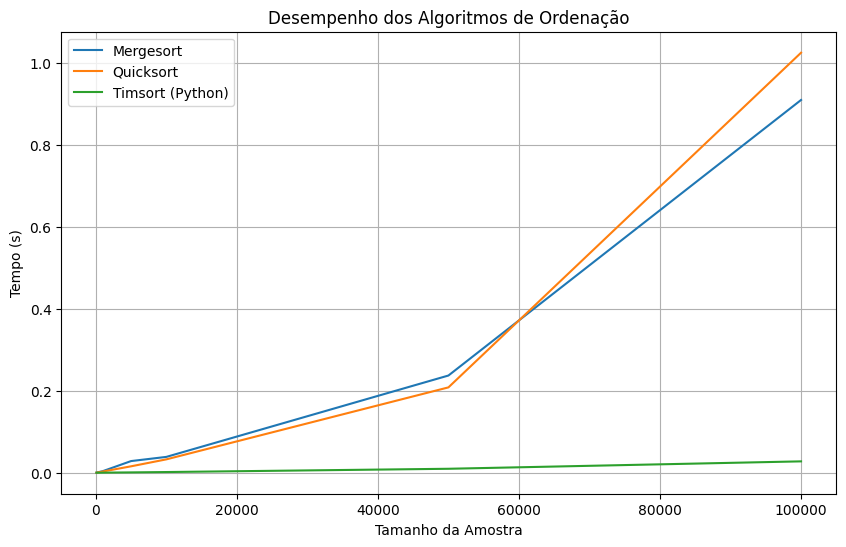

In [ ]:
plot_benchmark(sample_sizes, times_m_casos, times_q_casos, times_s_casos)

### Taxa de Mortalidade

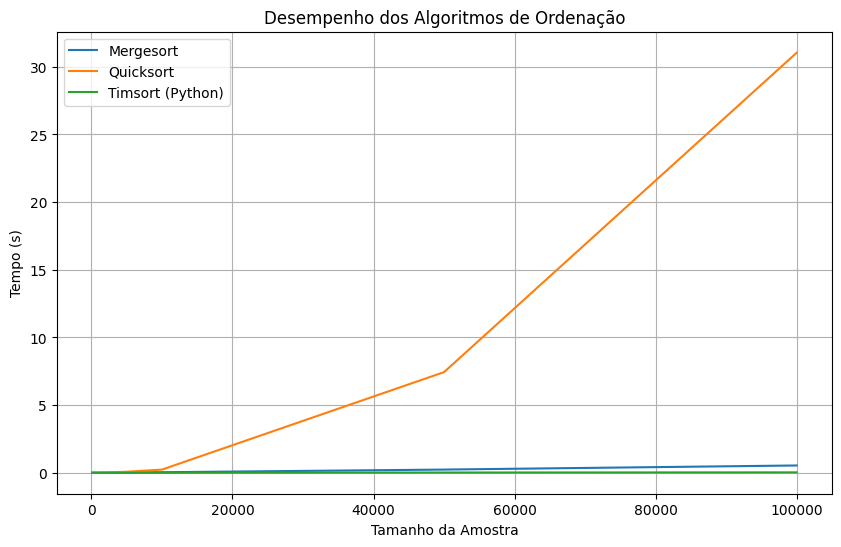

In [ ]:
plot_benchmark(sample_sizes, times_m_death_dec, times_q_death_dec, times_s_death_dec)

### Sobre o tempo do Quicksort

Enfim, nas colunas de Death Rate, o quicksort acaba apresentando um desempenho bem inferior mesmo com o caso médio sendo O(nlogn), acredito que isto se deva não só a escolha dos pivôs, mas à quantidade de valores iguais na coluna, que acabam realizando muitas trocas e divisões em sublista a esquerda e a direita (por ser um algoritmo instável).

In [ ]:
df_full["last_available_death_rate"].value_counts()

,count
last_available_death_rate,
0.0000,428617
0.0169,11004
0.0172,10170
0.0152,10099
0.0167,10094
...,...
0.1710,1
0.1706,1
0.3273,1


In [ ]:
df_full["last_available_confirmed_per_100k_inhabitants"].value_counts()

,count
last_available_confirmed_per_100k_inhabitants,
638.89599,334
2000.19419,239
909.09091,239
6105.47667,235
4744.77176,233
...,...
7950.36765,1
4022.59488,1
7988.29221,1


### Tempo Médio

Na coluna de casos por 100k habitantes, por não haver essa discrepância de ter valores iguais, o tempo médio do Quicksort se assemelha ao Mergesort, como esperado.

### Sobre o Timsort

O Timsort, da forma que o Python implementa tem complexidade do pior caso O(nlogn) e melhor caso O(n) (caso ja esteja ordenado), utiliza uma mescla do merge com o insertion sort para ordenar.

Porém, por estar implementado internamente em C, o desempenho geral do algoritmo acaba sendo bem melhor.

## Comparando os algoritmos para a mediana:

In [ ]:
def plot_median_benchmark(sample_sizes, times_m_m, times_m_q):
  plt.figure(figsize=(10, 6))
  plt.plot(sample_sizes, times_m_m, label="Median with MergeSort")
  plt.plot(sample_sizes, times_m_q, label="Median with QuickSelect")
  plt.xlabel("Tamanho da Amostra")
  plt.ylabel("Tempo (s)")
  plt.title("Desempenho dos Algoritmos de Mediana")
  plt.legend()
  plt.grid(True)
  plt.show()

### Casos confirmados por 100k habitantes

In [ ]:
times_median_merge, times_quickmedian = [],[]
for n in sample_sizes:
  print(f"List Size = {n}")
  data = list(df_full["last_available_confirmed_per_100k_inhabitants"].sample(n))

  # Median (Mergesort)
  start = time.time()
  median_mergesort(data.copy())
  times_median_merge.append(time.time() - start)
  print(f"Median w/ Mergesort: {time.time() - start}")

  # Median (QuickSelect)
  start = time.time()
  quickmedian(data.copy())
  times_quickmedian.append(time.time() - start)
  print(f"QuickSelect: {time.time() - start}\n")

List Size = 100
Median w/ Mergesort: 0.00022363662719726562
QuickSelect: 0.00012087821960449219

List Size = 1000
Median w/ Mergesort: 0.005280256271362305
QuickSelect: 0.0015645027160644531

List Size = 5000
Median w/ Mergesort: 0.02862858772277832
QuickSelect: 0.008810281753540039

List Size = 10000
Median w/ Mergesort: 0.0658564567565918
QuickSelect: 0.01279902458190918

List Size = 50000
Median w/ Mergesort: 0.39075279235839844
QuickSelect: 0.0638892650604248

List Size = 100000
Median w/ Mergesort: 0.7381770610809326
QuickSelect: 0.07759213447570801



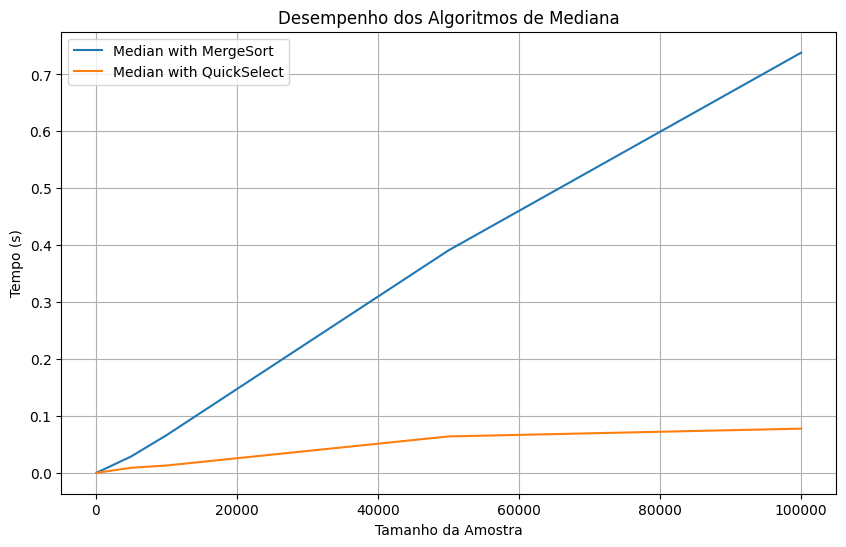

In [ ]:
plot_median_benchmark(sample_sizes, times_median_merge, times_quickmedian)

### Taxa de Mortalidade

In [ ]:
times_median_merge, times_quickmedian = [],[]
for n in sample_sizes:
  print(f"List Size = {n}")
  data = list(df_full["last_available_death_rate"].sample(n))

  # Median (Mergesort)
  start = time.time()
  median_mergesort(data.copy())
  times_median_merge.append(time.time() - start)
  print(f"Median w/ Mergesort: {time.time() - start}")

  # Median (QuickSelect)
  start = time.time()
  quickmedian(data.copy())
  times_quickmedian.append(time.time() - start)
  print(f"QuickSelect: {time.time() - start}\n")

List Size = 100
Median w/ Mergesort: 0.00022673606872558594
QuickSelect: 0.00010824203491210938

List Size = 1000
Median w/ Mergesort: 0.003484964370727539
QuickSelect: 0.0009517669677734375

List Size = 5000
Median w/ Mergesort: 0.01566004753112793
QuickSelect: 0.0063288211822509766

List Size = 10000
Median w/ Mergesort: 0.0351870059967041
QuickSelect: 0.013050317764282227

List Size = 50000
Median w/ Mergesort: 0.2028648853302002
QuickSelect: 0.04887199401855469

List Size = 100000
Median w/ Mergesort: 0.4634087085723877
QuickSelect: 0.0768442153930664



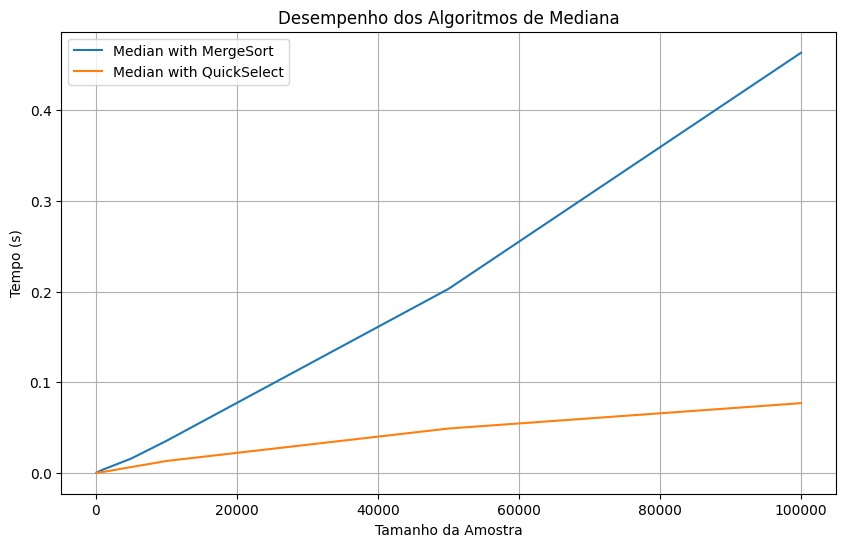

In [ ]:
plot_median_benchmark(sample_sizes, times_median_merge, times_quickmedian)

## Tabelas Top10

In [ ]:
df_sorted_confirmed_per_100k.reset_index().head(10)

,index,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,1657808,2022-03-14,RN,Severiano Melo,city,1084,15,465,True,2440.0,2088.0,2413607.0,51915.70881,0.0138
1,700844,2021-11-28,GO,Porteirão,city,2000,22,516,True,3881.0,3931.0,5218052.0,50877.63928,0.0110
2,42116,2021-12-18,AM,Japurá,city,1051,11,586,True,2755.0,2251.0,1302108.0,46690.35984,0.0105
3,2432006,2022-03-24,RS,Santa Cecília do Sul,city,720,4,601,True,1639.0,1634.0,4316733.0,44063.64749,0.0056
4,849622,2022-03-10,PA,Jacareacanga,city,3319,40,569,True,8239.0,7590.0,1503754.0,43728.59025,0.0121
5,784097,2022-03-24,MT,Paranaíta,city,4526,38,559,True,11225.0,11244.0,5106299.0,40252.57915,0.0084
6,1673335,2022-03-14,RN,Viçosa,city,693,4,459,True,1718.0,1725.0,2414902.0,40173.91304,0.0058
7,1615363,2022-03-14,RN,Frutuoso Gomes,city,1588,10,462,True,4068.0,4041.0,2404002.0,39297.20366,0.0063
8,2231543,2022-03-24,RS,Barra Funda,city,945,14,579,True,2539.0,2551.0,4301958.0,37044.29635,0.0148
9,2086078,2022-02-17,SC,Presidente Castello Branco,city,570,4,632,True,1568.0,1547.0,4213906.0,36845.50743,0.0070


In [ ]:
df_sorted_death_rate_dec.reset_index().head(10)

,index,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,549576,2021-09-16,MA,Milagres do Maranhão,city,239,0,492,True,8464.0,8483.0,2106672.0,2817.39950,0.0
1,570671,2021-09-16,MA,Santa Filomena do Maranhão,city,50,0,468,True,7773.0,7826.0,2109759.0,638.89599,0.0
2,580712,2021-09-16,MA,São Francisco do Brejão,city,542,0,488,True,11798.0,11941.0,2110856.0,4538.98333,0.0
3,652218,2021-11-28,GO,Guarani de Goiás,city,442,0,518,True,3893.0,3846.0,5209408.0,11492.45970,0.0
4,721342,2021-11-28,GO,Sítio d'Abadia,city,61,0,428,True,2989.0,3001.0,5220702.0,2032.65578,0.0
5,1068214,2021-08-22,PB,Riachão do Bacamarte,city,485,0,431,True,4521.0,4541.0,2512754.0,10680.46686,0.0
6,1310542,2021-09-22,MG,Aricanduva,city,149,0,317,True,5231.0,5269.0,3104452.0,2827.86107,0.0
7,1324641,2021-09-22,MG,Bonito de Minas,city,110,0,317,True,11230.0,11369.0,3108255.0,967.54332,0.0
8,1336711,2021-09-22,MG,Campo Azul,city,210,0,317,True,3817.0,3824.0,3111150.0,5491.63180,0.0
9,1354098,2021-09-22,MG,Cedro do Abaeté,city,38,0,317,True,1164.0,1157.0,3115607.0,3284.35609,0.0


## Valor da Mediana das Taxas

In [ ]:
print(median_confirmed_per_100k, median_death_rate)

10347.400314999999 0.0204


## Conclusão sobre a distribuição dos dados

In [ ]:
df_clean[["confirmed_per_100k_inhabitants","death_rate"]].describe()

,confirmed_per_100k_inhabitants,death_rate
count,5570.000000,5570.000000
mean,11403.035463,0.022944
std,6275.323937,0.014806
min,178.954900,0.000000
25%,6962.299600,0.014000
50%,10347.400315,0.020400
75%,14449.463822,0.028500
max,51915.708810,0.266700


As medianas encontradas são bem próximas das respectivas médias, o que nos da indícios que a distribuição dos dados é aproximadamente simétrica. Não temos muitos outliers puxando a média.

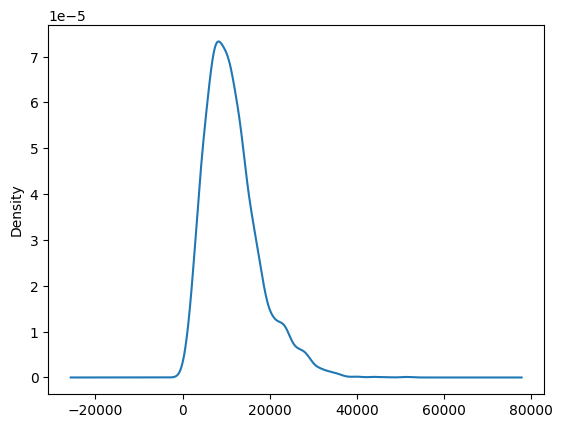

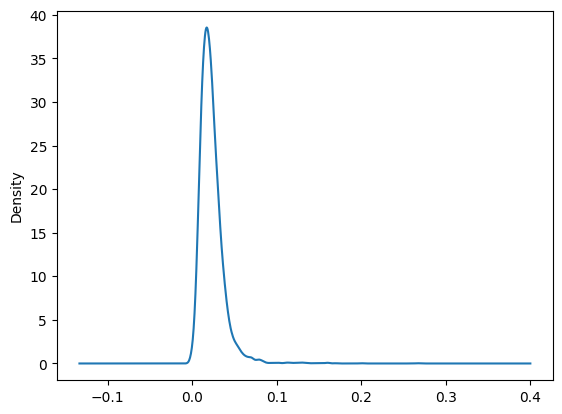

In [ ]:
df_clean["confirmed_per_100k_inhabitants"].plot(kind="kde")
plt.show()
df_clean["death_rate"].plot(kind="kde")
plt.show()